In [2]:
# 1. 读取 Excel 文件

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
!dir /b

.ipynb_checkpoints
MINGDEHENG-2.xlsx
out.csv
Python 处理报价-筛选特定值.ipynb
Python 处理报价.ipynb
Python 描述处理.ipynb
Untitled.ipynb


In [5]:
file = "MINGDEHENG-2.xlsx"

In [6]:
file = pd.ExcelFile(file)
# 需要提前安装 xlrd 和 openpyxl

In [7]:
# 查看sheet名称
sh = file.sheet_names
sh

['RFQ']

In [8]:
data = pd.read_excel(file, 'RFQ')

In [9]:
data.head()

,HHPN,Description,AMLPN,AML,Unit Price,Effective from,Min Pkg Qty(Pcs),Min Order Qty(Pcs),"L/T (Days), Calendar days",Cancellation Window_ Days,Reschedule Window_ Days,Delivery Term,Payment term,Remark
0,AREC12836,"OSC,CLK,4.096MHZ 50PPM,CMOS/TTL,1.8-3.3V",3.1.1.0409601,MINGDEHENG,0.170,2021.06.01,3000,30000,140,70,70,NaN,NaN,NaN
1,AREC12920,"XTAL,25.000MHZ,TOL30PPM/STAB30PPM,FUND,L",3206250001,MINGDEHENG,0.055,2021.06.01,3000,30000,126,56,56,NaN,NaN,NaN
2,AREC13080,"XTAL,50.000MHZ,TOL10PPM/STAB15PPM,FUND,L",3180500002,MINGDEHENG,0.055,2021.06.01,3000,30000,126,56,56,NaN,NaN,NaN
3,521846-252-00,"RESON,QRTZ,48MHZ,7PPM TOL,11PPM STAB,SM,",2.2.1.480000702,MINGDEHENG,0.078,2021.06.01,3000,30000,140,70,70,NaN,NaN,NaN
4,534709-019-00,"OSC,XTAL,32.768KHZ,SM,SM4,45 TO 55%,3.3V",4156327680,MINGDEHENG,0.200,2021.06.01,3000,30000,126,56,56,NaN,NaN,NaN


In [10]:
# 查看感兴趣的列
data[['HHPN', 'Unit Price']].head()

,HHPN,Unit Price
0,AREC12836,0.170
1,AREC12920,0.055
2,AREC13080,0.055
3,521846-252-00,0.078
4,534709-019-00,0.200


In [11]:
# 检查是否有重复的值

In [12]:
data.duplicated('HHPN').head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [13]:
se = data[data.duplicated('HHPN')].index
col = []
for i in se:
    col.append(data.loc[i])
col = pd.DataFrame(col)
col

,HHPN,Description,AMLPN,AML,Unit Price,Effective from,Min Pkg Qty(Pcs),Min Order Qty(Pcs),"L/T (Days), Calendar days",Cancellation Window_ Days,Reschedule Window_ Days,Delivery Term,Payment term,Remark
8,AREC12836,"OSC,CLK,4.096MHZ 50PPM,CMOS/TTL,1.8-3.3V",3.1.1.0409601,MINGDEHENG,0.170,2021.06.01,3000,30000,140,70,70,NaN,NaN,NaN
9,AREC12920,"XTAL,25.000MHZ,TOL30PPM/STAB30PPM,FUND,L",3206250001,MINGDEHENG,0.055,2021.06.01,3000,30000,126,56,56,NaN,NaN,NaN
10,AREC13080,"XTAL,50.000MHZ,TOL10PPM/STAB15PPM,FUND,L",3180500002,MINGDEHENG,0.055,2021.06.01,3000,30000,126,56,56,NaN,NaN,NaN
14,AREC12920,"XTAL,25.000MHZ,TOL30PPM/STAB30PPM,FUND,L",3206250001,MINGDEHENG,0.055,2021.06.01,3000,30000,126,56,56,NaN,NaN,NaN
15,AREC13080,"XTAL,50.000MHZ,TOL10PPM/STAB15PPM,FUND,L",3180500002,MINGDEHENG,0.055,2021.06.01,3000,30000,126,56,56,NaN,NaN,NaN
17,AREC13292,"OSC,CLK,MEMS,4.096MHZ,25PPM,3.3V,LVCMOS/",3.1.1.0409602,MINGDEHENG,0.170,2021.06.01,3000,30000,140,70,70,NaN,NaN,NaN
18,AREC13497,"XTAL,40.000MHZ,TOL10PPM/STAB10PPM,FUND,L",3110400003,MINGDEHENG,0.055,2021.06.01,3000,30000,126,56,56,NaN,NaN,NaN
19,AREC13526,"XTAL,40.000MHZ,TOL10PPM/STAB10PPM,FUND,L",3090400002,MINGDEHENG,0.055,2021.06.01,3000,30000,126,56,56,NaN,NaN,NaN


In [14]:
# HHPN
data.HHPN[data.duplicated('HHPN')]

8     AREC12836
9     AREC12920
10    AREC13080
14    AREC12920
15    AREC13080
17    AREC13292
18    AREC13497
19    AREC13526
Name: HHPN, dtype: object

In [15]:
# AMLPN
data[['HHPN', 'AMLPN', 'Unit Price']][data.duplicated('AMLPN')]


,HHPN,AMLPN,Unit Price
8,AREC12836,3.1.1.0409601,0.170
9,AREC12920,3206250001,0.055
10,AREC13080,3180500002,0.055
14,AREC12920,3206250001,0.055
15,AREC13080,3180500002,0.055
17,AREC13292,3.1.1.0409602,0.170
18,AREC13497,3110400003,0.055
19,AREC13526,3090400002,0.055


In [16]:
labels_basic = ['HHPN', 'AML', 'AMLPN','Unit Price']

In [17]:
# 2. 遍历文件夹内的 Excel 文件

In [18]:
data[labels_basic].head(3)

,HHPN,AML,AMLPN,Unit Price
0,AREC12836,MINGDEHENG,3.1.1.0409601,0.170
1,AREC12920,MINGDEHENG,3206250001,0.055
2,AREC13080,MINGDEHENG,3180500002,0.055


In [19]:
key = data.HHPN[0]+data.AML[0]+data.AMLPN[0]

In [20]:
key

'AREC12836MINGDEHENG3.1.1.0409601'

参考资料：[Pandas的insert插入一列](https://blog.csdn.net/shixiu_yuan/article/details/90205542?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522162281640216780357244449%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=162281640216780357244449&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-1-90205542.pc_search_result_control_group&utm_term=pandas+%E6%8F%92%E5%85%A5%E5%88%97&spm=1018.2226.3001.4187)

In [21]:
'''
创建 3KS 插入 DataFrame 中

'''

if '3ks' in data.columns:
    print('3ks 已存在')
else:
    keys = []
    for i in range(len(data)):
        key = data.HHPN[i] + data.AML[i] + str(data.AMLPN[i])
        keys.append(key)
    keys
    data.insert(0, '3ks', keys)

In [22]:
data[labels_basic].head()

,HHPN,AML,AMLPN,Unit Price
0,AREC12836,MINGDEHENG,3.1.1.0409601,0.170
1,AREC12920,MINGDEHENG,3206250001,0.055
2,AREC13080,MINGDEHENG,3180500002,0.055
3,521846-252-00,MINGDEHENG,2.2.1.480000702,0.078
4,534709-019-00,MINGDEHENG,4156327680,0.200


In [23]:
data['3ks'].head(3)

0    AREC12836MINGDEHENG3.1.1.0409601
1       AREC12920MINGDEHENG3206250001
2       AREC13080MINGDEHENG3180500002
Name: 3ks, dtype: object

In [24]:
data.insert(len(data.columns), 'FROM', data.HHPN)

In [25]:
data = data.drop(['3ks','Description', 'FROM'], axis = 1).dropna(axis = 1)

In [26]:
data.to_csv('out.csv', index = False) # 将 DataFrame 写入 Excel

<AxesSubplot:xlabel='Unit Price', ylabel='Density'>

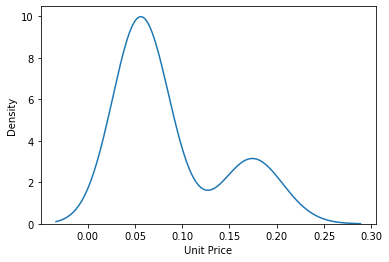

In [32]:
# 查看价格分布情况
sns.kdeplot(data['Unit Price'])

价格主要分布在 0.05 

In [39]:
# 查看数据描述
data['Unit Price'].describe()

count    20.000000
mean      0.086400
std       0.053673
min       0.055000
25%       0.055000
50%       0.055000
75%       0.101000
max       0.200000
Name: Unit Price, dtype: float64

In [41]:
# 中位数 = 50% 分位数
np.median(data['Unit Price'])

0.055